Reaction force at x=L for 2 elements: 5000.0 N
Reaction force at x=L for 8 elements: 4999.999999999999 N
Reaction force at x=L for 32 elements: 5000.000000000191 N
Reaction force at x=L for 128 elements: 4999.99999999991 N


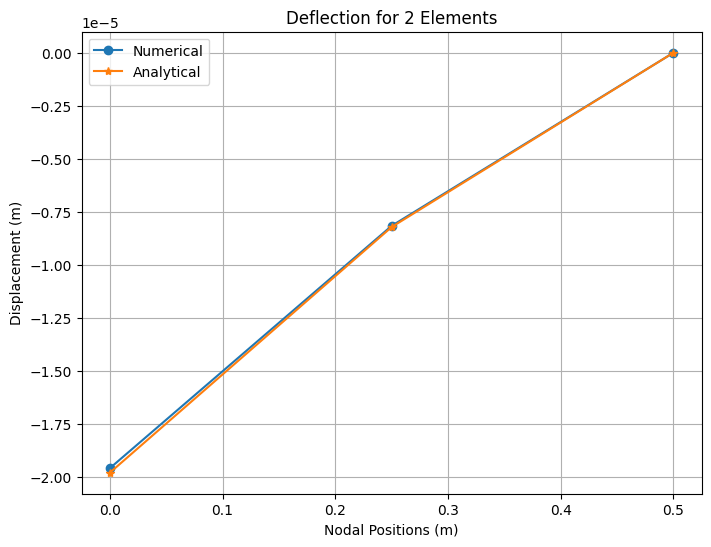

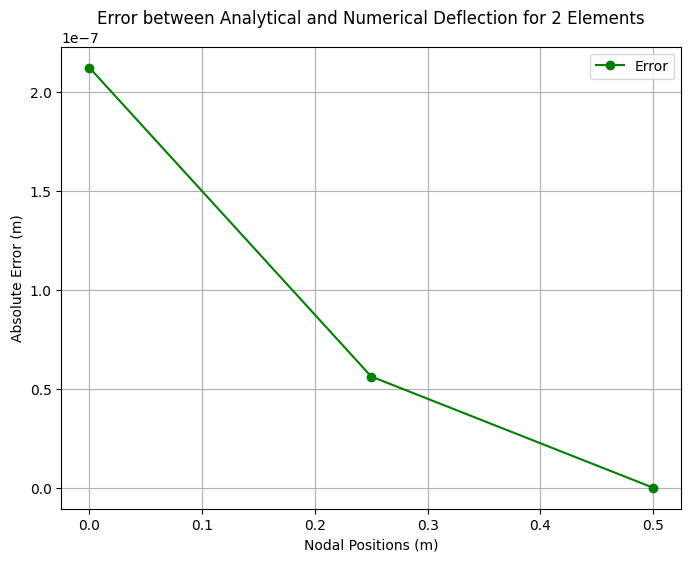

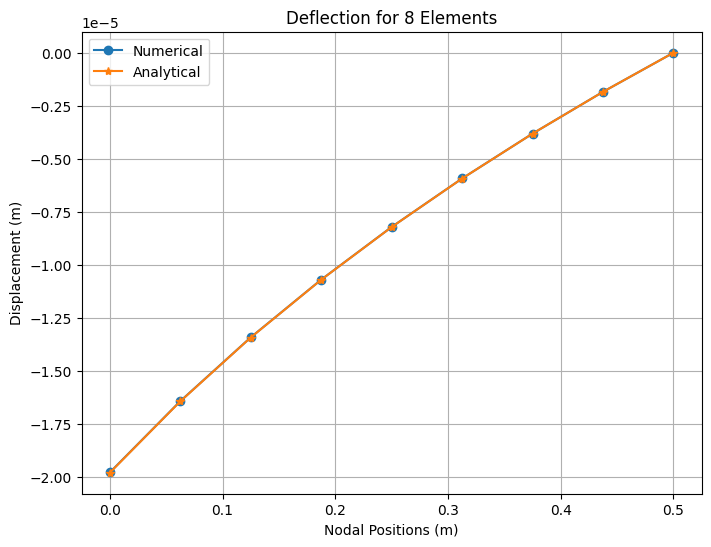

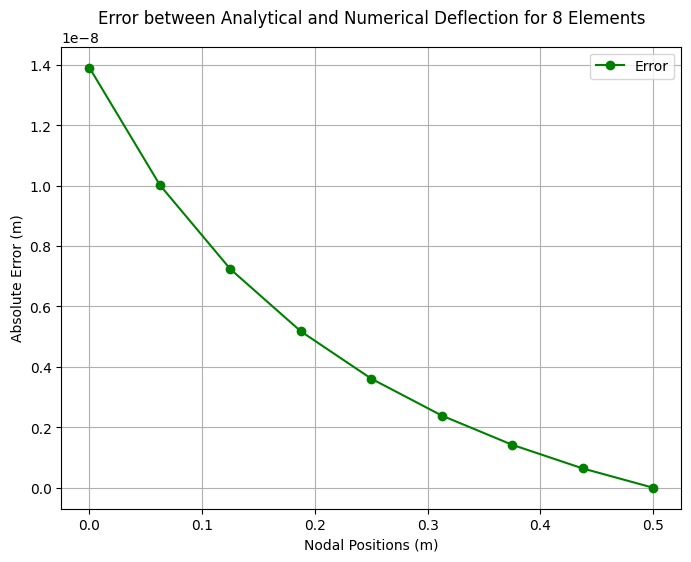

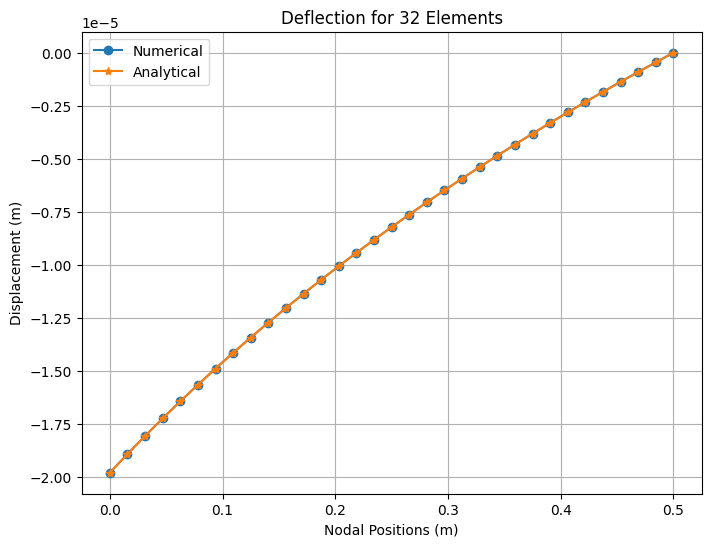

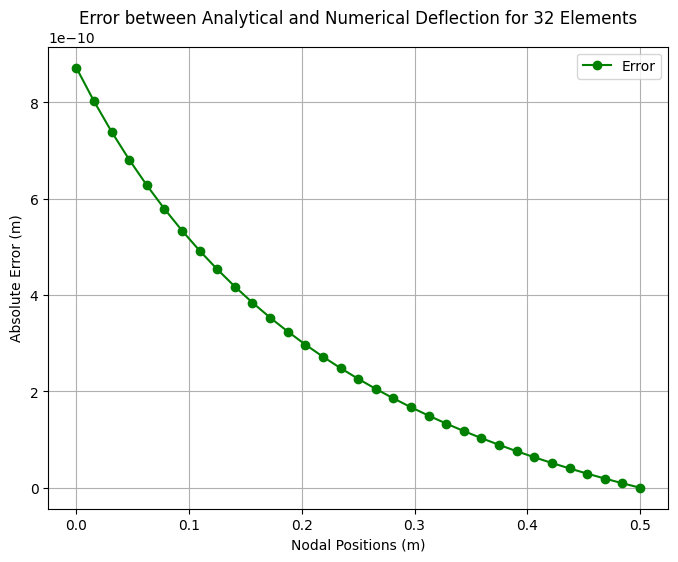

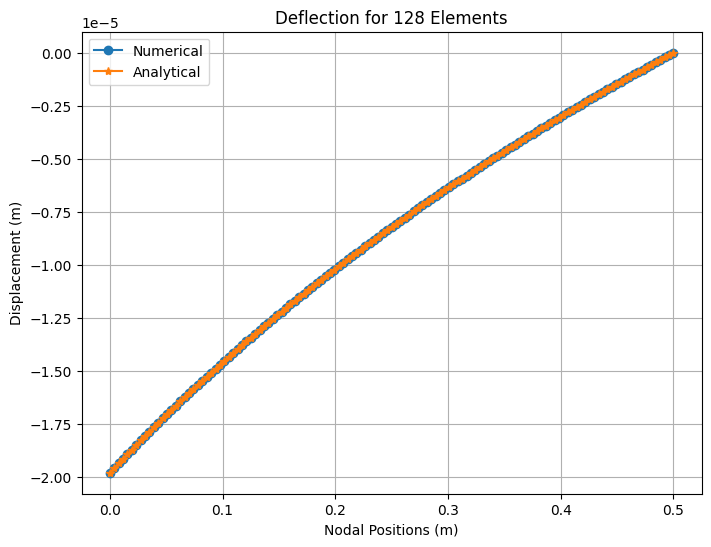

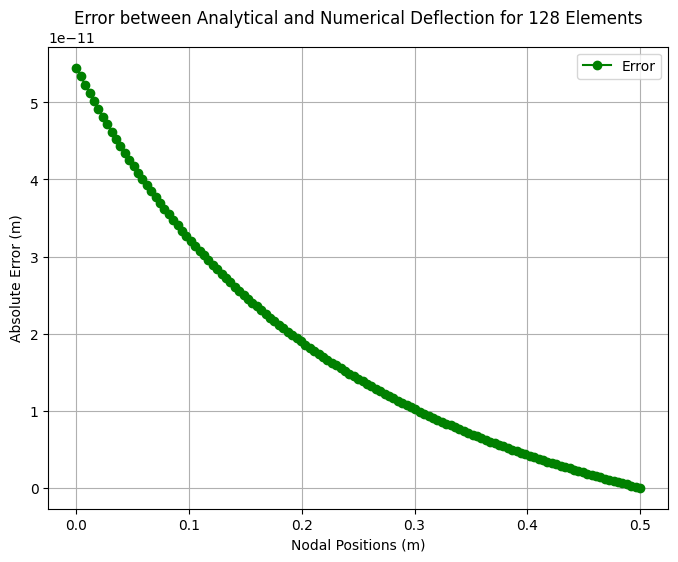

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


import numpy as np
import matplotlib.pyplot as plt

def nonuniform(inputs_list, num_elements):
    # Extract input parameters
    length = inputs_list['length']
    A0 = inputs_list['A0']
    YoungModulus = inputs_list['YoungModulus']
    force = inputs_list['force']

    # Calculate elemental length
    elementalLength = length / num_elements

    # Define t matrix
    t = np.array([[1, -1], [-1, 1]])

    # Calculate nodal positions
    nodesPosi = np.linspace(0, length, num_elements + 1).reshape(-1, 1)

    # Number of nodes
    num_nodes = num_elements + 1

    # Global stiffness matrix, displacement vector, and force vector
    kg = np.zeros((num_nodes, num_nodes))
    u = np.zeros((num_nodes, 1))
    F = np.zeros((num_nodes, 1))
    F[0] = force
    FE = F[:num_elements, :num_elements]

    # Calculate local stiffness matrix and assemble global stiffness matrix
    for i in range(num_elements):
        x = i
        A_x = A0 * (1 + ((nodesPosi[x] + nodesPosi[x + 1]) / (2 * length)))
        K = (A_x * YoungModulus / elementalLength) * t
        idx = [x, x + 1]
        kg[np.ix_(idx, idx)] += K

    # Solve for nodal displacements
    KGE = kg[:num_elements, :num_elements]
    uE = np.linalg.solve(KGE, FE)
    u[:num_elements] = uE

    # Calculate reaction force at the fixed node
    ReactionForce = np.dot(kg[num_elements], u)

    # Analytical solution
    u_analytical = []
    for i in nodesPosi:
        val = (5000 * length * np.log((length + i) / (2 * length))) / (YoungModulus * A0)
        u_analytical.append(val)
    u_analytical = np.array(u_analytical).reshape(-1, 1)

    # Calculate the absolute error between analytical and numerical solutions
    error = np.abs(u - u_analytical)

    return nodesPosi, u, ReactionForce, u_analytical, error

# Input parameters
inputs_list = {
    'length': 0.5,
    'A0': 12.5e-4,  # m^2 (Initial cross-sectional area at x=0)
    'YoungModulus': 70e9,  # Pa
    'force': -5000,  # N
}

# Numbers of elements to iterate over

element_numbers = [2,8,32,128]
for num_elements in element_numbers:
    nodesPosi, u, ReactionForce, u_analytical, error = nonuniform(inputs_list, num_elements)

    # Plot deflection with reversed x-axis
    plt.figure(figsize=(8, 6))
    plt.plot(nodesPosi, u, marker='o', label=f'Numerical')
    plt.plot(nodesPosi, u_analytical, marker='*', label=f'Analytical')
    plt.xlabel("Nodal Positions (m)")
    plt.ylabel("Displacement (m)")
    plt.title(f'Deflection for {num_elements} Elements')
    plt.legend()
    plt.grid()
     # Reverse the x-axis

    # Print reaction force
    print(f'Reaction force at x=L for {num_elements} elements: {ReactionForce[0]} N')

    # Plot the error with reversed x-axis
    plt.figure(figsize=(8, 6))
    plt.plot(nodesPosi, error, marker='o',color='green', label=f'Error')
    plt.xlabel("Nodal Positions (m)")
    plt.ylabel("Absolute Error (m)")
    plt.title(f'Error between Analytical and Numerical Deflection for {num_elements} Elements')
    plt.legend()
    plt.grid()
    # Reverse the x-axis

plt.show()


# In[ ]: